In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

print('TF VERSION:', tf.__version__)

TF VERSION: 2.13.0


In [11]:
df = pd.read_csv("EcoPreprocessed.csv")

df.head()

,Unnamed: 0,review,polarity,division
0,3870,able play youtube alexa,0.5000,positive
1,62,able recognize indian accent really well drop ...,0.2794,positive
2,487,absolute smart device amazon connect external ...,0.1827,positive
3,3204,absolutely amaze new member family control hom...,0.3682,positive
4,1265,absolutely amaze previously sceptical invest m...,0.2333,positive


In [6]:
os.getcwd()

'C:\\Users\\Tanay'

In [12]:
X = list(df.review)
Y = df.division

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.15, shuffle=True, random_state=0, stratify=Y
)

In [14]:
print('NO. OF TRAINING EXAMPLES:', len(X_train), ' TYPE: ', type(X_train))
print('NO. OF VALIDATION EXAMPLES:', len(X_test), ' TYPE: ', type(X_test))

NO. OF TRAINING EXAMPLES: 3471  TYPE:  <class 'list'>
NO. OF VALIDATION EXAMPLES: 613  TYPE:  <class 'list'>


In [15]:
def show_example(data):
    print(random.sample(data, 1))
    
show_example(X_train)
show_example(X_test)

['amaze product alexa will follow command say']
['worst product buy first alexa previous year work fine but deal offer alexa doesnt work properly can not recognise voice command sellers sell reject product']


In [16]:
NUM_WORDS = 1000
OOV_TOKEN = '<<OOV>>'
MAXLEN = 40
PADDING_TYPE = 'post'
TRUNCATING_TYPE = 'post'

tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=NUM_WORDS,
    oov_token=OOV_TOKEN
)

tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(
    X_train_sequences,
    maxlen=MAXLEN,
    padding=PADDING_TYPE,
    truncating=TRUNCATING_TYPE
)

X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(
    X_test_sequences,
    maxlen=MAXLEN,
    padding=PADDING_TYPE,
    truncating=TRUNCATING_TYPE
)


In [17]:
label_encoder = LabelEncoder()

Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)

In [18]:
EMBEDDING_DIM = 8

model = tf.keras.Sequential([
    layers.Embedding(NUM_WORDS, EMBEDDING_DIM, input_length=MAXLEN),
    layers.Flatten(),
    layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 8)             8000      
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 3)                 963       
                                                                 
Total params: 8963 (35.01 KB)
Trainable params: 8963 (35.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
SAVED_MODEL_PATH = 'ckpt/data_sentiment_classifier.h5'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    SAVED_MODEL_PATH,
    monitor='val_loss',
    save_best_only=True,
    verbose=True
)

In [20]:
history = model.fit(
    X_train_padded,
    Y_train,
    epochs=20,
    validation_data=(X_test_padded, Y_test),
    callbacks=[model_checkpoint]
)


Epoch 1/20
 95/109 [=========================>....] - ETA: 0s - loss: 0.8333 - accuracy: 0.7467
Epoch 1: val_loss improved from inf to 0.72311, saving model to ckpt\data_sentiment_classifier.h5
109/109 [==============================] - 1s 3ms/step - loss: 0.8237 - accuracy: 0.7462 - val_loss: 0.7231 - val_accuracy: 0.7504
Epoch 2/20
100/109 [==========================>...] - ETA: 0s - loss: 0.6835 - accuracy: 0.7513
Epoch 2: val_loss improved from 0.72311 to 0.63325, saving model to ckpt\data_sentiment_classifier.h5


C:\Users\Tanay\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


109/109 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.7508 - val_loss: 0.6332 - val_accuracy: 0.7504
Epoch 3/20
 96/109 [=========================>....] - ETA: 0s - loss: 0.5590 - accuracy: 0.7575
Epoch 3: val_loss improved from 0.63325 to 0.52664, saving model to ckpt\data_sentiment_classifier.h5
109/109 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.7574 - val_loss: 0.5266 - val_accuracy: 0.7732
Epoch 4/20
101/109 [==========================>...] - ETA: 0s - loss: 0.4573 - accuracy: 0.7930
Epoch 4: val_loss improved from 0.52664 to 0.46803, saving model to ckpt\data_sentiment_classifier.h5
109/109 [==============================] - 0s 1ms/step - loss: 0.4573 - accuracy: 0.7934 - val_loss: 0.4680 - val_accuracy: 0.8140
Epoch 5/20
 46/109 [===========>..................] - ETA: 0s - loss: 0.4141 - accuracy: 0.8152
Epoch 5: val_loss improved from 0.46803 to 0.43274, saving model to ckpt\data_sentiment_classifier.h5
109/109 [====

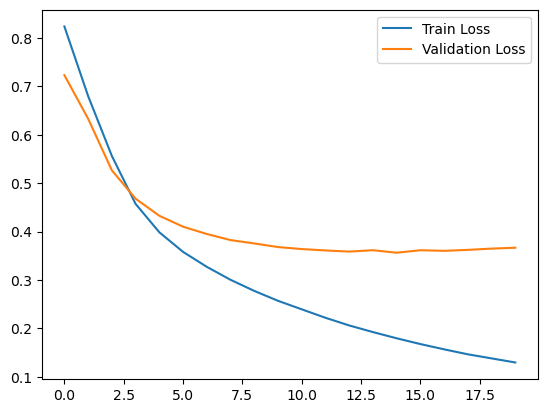

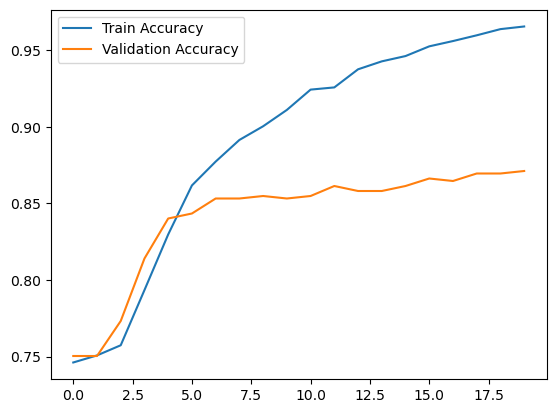

In [23]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [24]:
saved_model = tf.keras.models.load_model(SAVED_MODEL_PATH)
saved_model.evaluate(X_test_padded, Y_test)

20/20 [==============================] - 0s 1ms/step - loss: 0.3564 - accuracy: 0.8613


[0.35641857981681824, 0.8613376617431641]